# LAB 1

 **Name**: Heja Bibani  
 **Student Number**: 16301173


### 1. TASK 2
 Write down the version of Qiskit, Qiskit-terra, Qiskit-aer

In [9]:
import qiskit

qiskit.__qiskit_version__

version = qiskit.__qiskit_version__

print("Qiskit: " + version['qiskit'])
print("Qiskit-terra: " + version['qiskit-terra'])
print("Qiskit-aer: " + version['qiskit-aer'])

Qiskit: 0.34.2
Qiskit-terra: 0.19.2
Qiskit-aer: 0.10.3


 From the above, you can notice that qiskit has many elements. The version of Qiskit, Qiskit-terra, Qiskit-aer are the     following:
 
 Qiskit: '0.34.2'  
 Qiskit-terra: '0.19.2'  
 Qiskit-aer: '0.10.3'
 
 The qiskit.__qiskit_version__ is a dictionary in which we can extract the values of the versions of software we want to know. 

### 2. Task 3
 
Create  a  simple  quantum  circuit  with  measurement  and visualization by  following the  steps below:

#### Step 3.1: Import all necessary packages

In [10]:
from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor
from qiskit.providers.ibmq import least_busy
import matplotlib

#### Step 3.2: Create a circuit with 2 input qubits and 2 output bits

 A quantum circuit consists of a qubit register as input, some gates for processing, and a classical bit register as output. In this circumstance, we are interested in creating a circuit which consists of two qubits and two classical registers to store the output.

In [11]:
# Construct a circuit with a 2-qubit register as input and 2-bit classical register as output.
circuit = QuantumCircuit(2, 2)

#### Step 3.3: Apply h()  gate  to  𝑞0, apply  x()  gate  to  𝑞1, and finally apply cx()  gate  to  𝑞0  and  𝑞1.

 With the cirucit that we have created, we can then apply quantum gates to each of the inputs. Some of these gates may require more than one input. We are applying a hadarmard gate on input 0, a not gate on input 1, and then a cnot gate on inputs 0 and 1.

In [12]:
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)

#### Step 3.4: Measure  𝑞0  and  𝑞1, and store  the  measurement  results  into bits  0 and 1 respectively. 

 We can then store the value of the outputs after a gate has been applied in the classical registers we created.

In [13]:
circuit.measure(0,0)
circuit.measure(1,1)

#### Step 3.5: Visualize this  circuit.

 We can then visualize the circuit by calling circuit.draw() function. In this case, we are using the format of matplotlib and including this by using the "%" paramter.

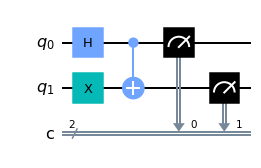

In [14]:
%matplotlib inline
circuit.draw()

### 3. Task 4
 Run the  above  quantum  circuit  with  a  QasmSimulator  for  2000 shots  and plot  the  result  with  a histogram.  The     expected result  is  that  ‘01’  and ‘10’  should each  appear  with  about  50% probability,  and ‘00’  and  ‘11’  won’t  appear.   

 We will then use QasumSimulator() to run a program without quantum noise. Qasm stands for quantum assembly. Thus, only the values '01' and '10' should appear.

<class 'qiskit.result.counts.Counts'>

 The counts for different outputs are: {'01': 990, '10': 1010}


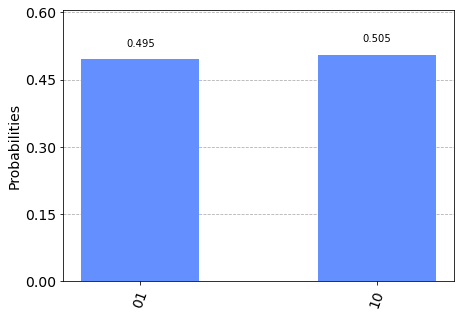

In [15]:
simulator = QasmSimulator()
job = execute(circuit, backend=simulator, shots=2000)
# Call result() to obtain the result
result = job.result()
# Call get_counts() to obtain the counts of different outputs
counts = result.get_counts(circuit)
# NB: 'counts' has a type of <class 'qiskit.result.counts.Counts'>, 
# which is similar to a type of dictionary.
print(type(counts))

# Print the counts of different outputs
print("\n The counts for different outputs are:", counts)
# Plot the histogram
# Need: from qiskit.visualization import plot_histogram
plot_histogram(counts)

### 4. Task 5
Run the  above  quantum  circuit  with  a  real  IBM  quantum  computer  by following the  steps  below.

#### Step 5.1: Create  an account  at  the  IBM  quantum  website,  and retrieve  your  API  token. Store  this token into your  local  qiskit  installation by calling IBMQ.save_account(). 

In [16]:
IBMQ.save_account('9005ac0977243c9130d37f556dcc1131d86a33cfdb9cff3564c28197626ede0fced03ce77b943f150df2346ff629bd06a95ea33bad03541c2e3c54ff614388be', overwrite=True)

#### Step 5.2: Find a  least  busy real  computer. 

We will find the least busiest computer to the job for us by calling the following function. In this scenario we are using an actual quantum computer. Because of this, we should expect that there will be some quantum noise in the histogram plot. The least busy backend should be the output. In this scenario, it was ibmq_quito.

In [17]:
provider = IBMQ.load_account()

qcomp = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", qcomp)

ibmqfactory.load_account:WARNING:2022-03-12 20:15:36,792: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_quito


#### Step 5.3: Run  the  circuit with  this  computer for 1200 shots  and plot  the  result  with  a  histogram. 


  We should expect that we will be placed in a queue. We apply a job-monitor to see the status of the job. The result should finish with "has successfully run" and then we can retrieve the results from the job that was completed.

In [18]:
# Run the circuit with certain number of shots.
from qiskit.tools import job_monitor
job = execute(circuit, backend=qcomp, shots=1200)
job_monitor(job, interval=3)
qcomp_result = job.result()
qcomp_counts = qcomp_result.get_counts(circuit)

Job Status: job has successfully run


{'00': 50, '01': 524, '10': 614, '11': 12}


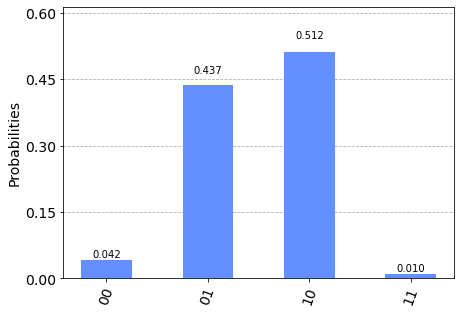

In [19]:
print(qcomp_counts)
plot_histogram(qcomp_counts)

 As expected the results show that there is indeed some quantum noise being demonstrated by the output. The inputs '00' and '11' appear despite it not appearing in the first output of our results.

#### Step 5.4: Explain why  you see  ‘00’  and ‘11’  appear  in some  shots  in a  Markdown  cell. 

The qasm simulator which was called in task 4 does not include quantum noise. We noticed in the first histogram that 01 and 10 were generated with equal likelihood. And the values 00 and 11 were not possibilities. In reality quantum computers are still being developed. One of the issues in its current stage of developement is the concept of quantum noise. This is the reason why 00 and 11 appear in this histogram and does not appear in the first histogram. 
